In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud, STOPWORDS

from structs import DataSet

# Sentence Puzzle
Sentence-type brain teaser where the puzzle defying commonsense is centered on sentence snippets.

In [2]:
sp = DataSet.from_file("../data/SP-train.pkl")
len(sp)

507

## SVD

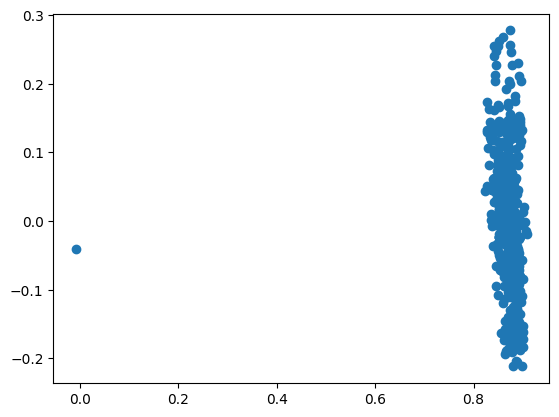

In [3]:
sp_embeddings = np.array([instance.embedding for instance in sp])
sp_svd = TruncatedSVD().fit_transform(sp_embeddings)
plt.scatter(sp_svd[:, 0], sp_svd[:, 1])

In [4]:
idx = (sp_svd[:, 0] < 0.1).nonzero()[0][0]

sp[idx]

Question: There was once a bad wizard. He abducted three women from their homes and transformed them into identical rose plants. They were placed in his garden. One of the women pleaded with the magician to allow her to see her husband and kids. He concurred. He took the woman to her home at night. He arrived early in the morning and drove her home. The spouse made the decision to go get her one day. He entered the wizard's garden as a result. He kept glancing at the three identical rose bushes, trying to determine which one might be his wife. He took his wife home as soon as he realized the solution. How did he recognize his wife among the rosebushes?
A (correct): The wizard brought the rosebush to her home at night and returned her to the garden in the morning. Therefore, she was the only plant without dew.
B: The husband knew which rose bush was his wife because it was the only one that still had her distinctive scent.
C: The husband knew which rose bush was his wife because it was 

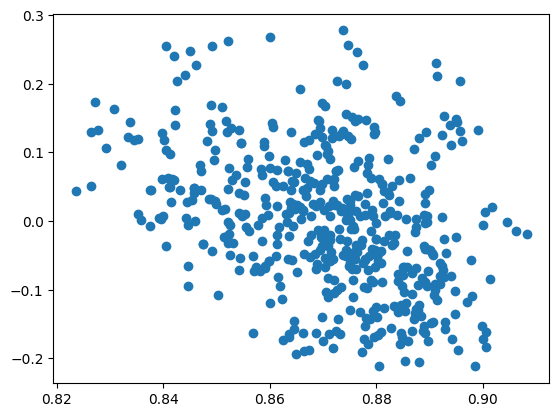

In [5]:
sp_svd = np.delete(sp_svd, idx, 0)
plt.scatter(sp_svd[:, 0], sp_svd[:, 1])

## WordCloud

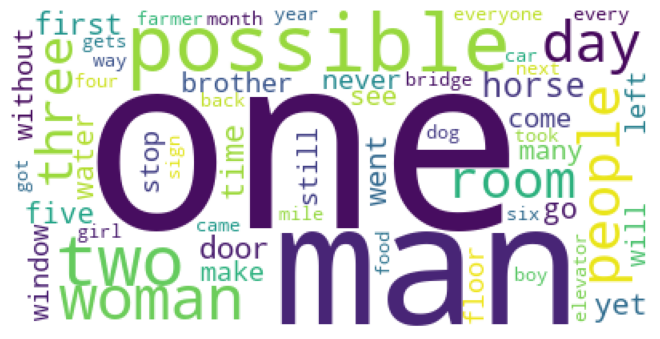

In [6]:
words = " ".join(sum([[tok.lower() for tok in instance.question.split()] for instance in sp], []))

wordcloud = WordCloud(
    background_color="white",
    stopwords=STOPWORDS,
    min_font_size=10
).generate(words)

plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [7]:
print("\n\n---\n\n".join([str(instance) for instance in sp.shuffle_instances()[:10]]))

Question: A woman is stuck on an isolated island with no food, water, or other human beings. The only things she has are a backpack and a fishing rod. She can't fish because there are no fish in the surrounding waters and she can't drink the seawater. How will she survive?
A (correct): The woman has to use the fishing rod to catch birds or other wildlife and use the backpack to collect rainwater for drinking.
B: As the situation is pretty urgent, the woman has no choice but to eat the backpack and fishing rod directly for energy.
C: The woman should use the fishing rod to hook onto a passing plane or a bird flying high in the sky, which will then whisk her away to safety.
D (unsure): None of above.        

---

Question: Four men were in a boat on the lake. The boat turns over, and all four men sink to the bottom of the lake, yet not a single man got wet! Why?
A (correct): Because they were all married and not single.
B: Despite the boat turning over and sinking, the water level was n

# Word Puzzle
Word-type brain teaser where the answer violates the default meaning of the word and focuses on the letter composition of the target question

In [8]:
wp = DataSet.from_file("../data/WP-train.pkl")
len(wp)

396

## SVD

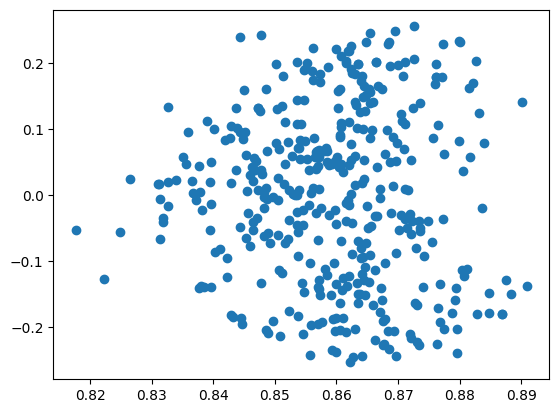

In [9]:
wp_embeddings = np.array([instance.embedding for instance in wp])
wp_svd = TruncatedSVD().fit_transform(wp_embeddings)
plt.scatter(wp_svd[:, 0], wp_svd[:, 1])

## Word cloud

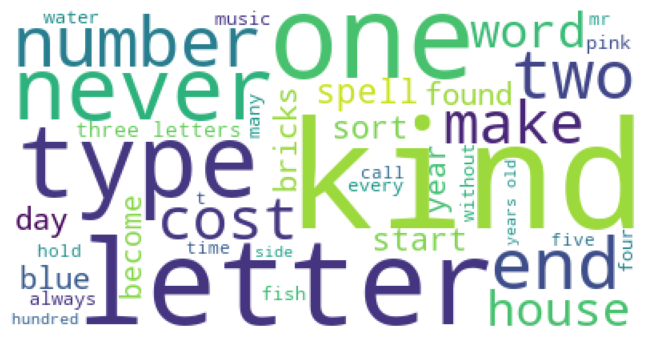

In [10]:
words = " ".join(sum([[tok.lower() for tok in instance.question.split()] for instance in wp], []))

wordcloud = WordCloud(
    background_color="white",
    stopwords=STOPWORDS,
    min_font_size=10
).generate(words)

plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## A few examples

In [11]:
print("\n\n---\n\n".join([str(instance) for instance in wp.shuffle_instances()[:10]]))

Question: In what book can you find the most number of notes?
A (correct): A music book
B: A fiction book.
C: A comic book.
D (unsure): None of above.        

---

Question: How did the champ repair the leaking facet?
A (correct): With a monkey wrench.
B: With an adjustable wrench.
C: With a stubby wrench.
D (unsure): None of above.        

---

Question: What do you call a ghost without a host?
A (correct): G.
B: H.
C: T.
D (unsure): None of above.        

---

Question: What sort of note is valuable?
A (correct): A banknote.
B: A music note.
C: A high note.
D (unsure): None of above.        

---

Question: What is inside a C that starts with W?
A (correct): Water.
B: Wisdom.
C: Wall.
D (unsure): None of above.        

---

Question: What arithmetic symbol can we place between 2 and 3 to make a number greater than 2 but less than 3?
A (correct): A decimal point.
B: A division sign.
C: A plus sign.
D (unsure): None of above.        

---

Question: What does I RIGHT I mean?  
A (c